In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# 2022년 5월 1일 0시부터 24시까지 1초 간격으로 timestamp 생성
timestamp = pd.date_range(start='2022-05-01', end='2022-05-02', freq='S')[:-1]

# 0부터 1까지의 랜덤한 값을 생성하여 value로 설정
value = np.random.rand(len(timestamp))

# 간헐적으로 발생하는 anomaly 추가
for i in range(0, len(timestamp), 500):
    value[i:i+50] += np.random.normal(loc=2, scale=0.5, size=50)
    
# timestamp와 value로 이루어진 데이터프레임 생성
df = pd.DataFrame({'timestamp': timestamp, 'value': value})

# 데이터셋을 train과 test 데이터셋으로 나눔 (train : test = 7 : 3)
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)


In [2]:
hyperparameters = {'keras.Sequential.LSTMTimeSeriesRegressor#1': {'epochs': 1}}
                   
orion = Orion(
     pipeline='lstm_dynamic_threshold',
     hyperparameters=hyperparameters)

In [3]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

In [4]:
print(df_small_noise.head())

print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


In [5]:
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


Training input shape:  (3745, 288, 1)


In [1]:
from typing import List, Union

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

from orion import Orion

hyperparameters = {
    'keras.Sequential.LSTMTimeSeriesRegressor#1': {
        'epochs': 1,
        'verbose': True
    }
}

orion = Orion(
    pipeline='lstm_dynamic_threshold',
    hyperparameters=hyperparameters
)

# 2022년 5월 1일 0시부터 24시까지 1초 간격으로 timestamp 생성
timestamp = pd.date_range(start='2022-05-01', end='2022-05-02', freq='S')[:-1]

# 0부터 1까지의 랜덤한 값을 생성하여 value로 설정
value = np.random.rand(len(timestamp))

# 간헐적으로 발생하는 anomaly 추가
for i in range(0, len(timestamp), 500):
    value[i:i+50] += np.random.normal(loc=2, scale=0.5, size=50)
    
# timestamp와 value로 이루어진 데이터프레임 생성
df = pd.DataFrame({'timestamp': timestamp, 'value': value})

# 데이터셋을 train과 test 데이터셋으로 나눔 (train : test = 7 : 3)
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)


2023-05-12 01:25:14.592805: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
orion.fit(train_data)

In [ ]:
anomalies = orion.detect(test_data)

In [18]:
df = pd.read_csv('data.csv')

start_time = pd.Timestamp.now()  # 현재 시간을 시작 시간으로 설정

df['timestamp'] = pd.date_range(start=start_time, periods=179, freq='10S')

separate = '2023-05-15 14:12:52.811248'
train_df = df[df['timestamp']< separate]
test_df = df[df['timestamp']>= separate]

train_df

,timestamp,cpu_percent
0,2023-05-15 13:57:14.959774,3.1
1,2023-05-15 13:57:24.959774,5.9
2,2023-05-15 13:57:34.959774,6.6
3,2023-05-15 13:57:44.959774,6.3
4,2023-05-15 13:57:54.959774,4.8
...,...,...
89,2023-05-15 14:12:04.959774,5.8
90,2023-05-15 14:12:14.959774,4.8
91,2023-05-15 14:12:24.959774,5.2
92,2023-05-15 14:12:34.959774,6.2


In [3]:
from darts import TimeSeries


# Create a TimeSeries, specifying the time and value columns
train_series = TimeSeries.from_dataframe(train_df, "timestamp", "cpu_percent")
test_series = TimeSeries.from_dataframe(test_df, "timestamp", "cpu_percent")


ImportError: cannot import name 'TimeSeries' from 'darts' (/home/eda_framework_visualization/darts.py)

In [4]:
from darts.ad.scorers import kmeans_scorer

model = kmeans_scorer.KMeansScorer()


ModuleNotFoundError: No module named 'darts.ad'; 'darts' is not a package

In [24]:
model.fit(train_series)

In [2]:
anom_score = model.score(test_series)

NameError: name 'model' is not defined

In [1]:
anom_score.plot()
anom_df = anom_score.pd_dataframe(columns = ['timestamp', 'cpu']) 
df

NameError: name 'anom_score' is not defined

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    VARIMA,
)
from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset, ElectricityDataset

import logging

logging.disable(logging.CRITICAL)

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
torch.cuda.set_device(0)  # 첫 번째 GPU를 사용하도록 설정

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)

In [2]:
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

In [3]:
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

In [4]:
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

In [5]:
model_air = NBEATSModel(
    input_chunk_length=24, output_chunk_length=12, n_epochs=200, random_state=0
)

In [6]:

model_air.fit(train_air, verbose=True);


RuntimeError: Lightning can't create new processes if CUDA is already initialized. Did you manually call `torch.cuda.*` functions, have moved the model to the device, or allocated memory on the GPU any other way? Please remove any such calls, or change the selected strategy. You will have to restart the Python kernel.

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from darts import TimeSeries
from darts.models import FFT, AutoARIMA, ExponentialSmoothing, Theta
from darts.metrics import mae
from darts.utils.missing_values import fill_missing_values
from darts.datasets import TemperatureDataset, AirPassengersDataset, EnergyDataset

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [8]:
ts = TemperatureDataset().load()


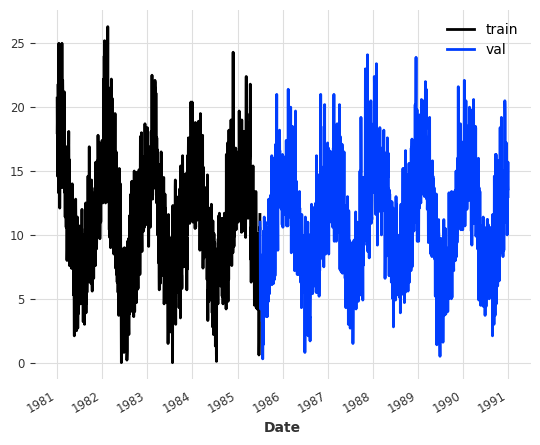

In [9]:
train, val = ts.split_after(pd.Timestamp("19850701"))
train.plot(label="train")
val.plot(label="val")

In [10]:

model = FFT(required_matches=set(), nr_freqs_to_keep=None)
model.fit(train)
pred_val = model.predict(len(val))

MAE: 5.424526892430279


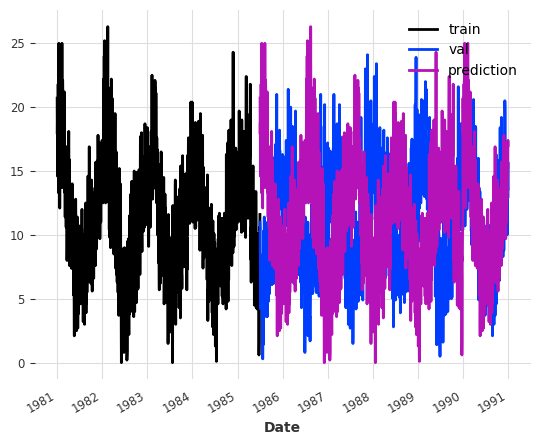

In [11]:
train.plot(label="train")
val.plot(label="val")
pred_val.plot(label="prediction")
print("MAE:", mae(pred_val, val))

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries

In [14]:
# Read data:
series = AirPassengersDataset().load()

# Create training and validation sets:
train, val = series.split_after(pd.Timestamp("19590101"))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

# create month and year covariate series
year_series = datetime_attribute_timeseries(
    pd.date_range(start=series.start_time(), freq=series.freq_str, periods=1000),
    attribute="year",
    one_hot=False,
)
year_series = Scaler().fit_transform(year_series)
month_series = datetime_attribute_timeseries(
    year_series, attribute="month", one_hot=True
)
covariates = year_series.stack(month_series)
cov_train, cov_val = covariates.split_after(pd.Timestamp("19590101"))

In [15]:
my_model = RNNModel(
    model="LSTM",
    hidden_dim=20,
    dropout=0,
    batch_size=16,
    n_epochs=300,
    optimizer_kwargs={"lr": 1e-3},
    model_name="Air_RNN",
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=14,
    force_reset=True,
    save_checkpoints=True,
)

In [16]:
my_model.fit(
    train_transformed,
    future_covariates=covariates,
    val_series=val_transformed,
    val_future_covariates=covariates,
    verbose=True,
)

RuntimeError: Lightning can't create new processes if CUDA is already initialized. Did you manually call `torch.cuda.*` functions, have moved the model to the device, or allocated memory on the GPU any other way? Please remove any such calls, or change the selected strategy. You will have to restart the Python kernel.